# Question 1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### From the given link, download “anneal.data”, “anneal.names” and “anneal.test”, convert them into a readable format (Ex: txt, csv, etc....) and do meaningful Exploratory Data Analysis.

In [3]:
df_train = pd.read_csv("anneal.data", header=None)
df_test = pd.read_csv("anneal.test", header=None)
df_train.columns = ["family", "product-type", "steel", "carbon", "hardness", "temper_rolling", "condition", "formability", "strength", "non-ageing", "surface-finish", "surface-quality", "enamelability", "bc", "bf", "bt", "bw/me", "bl", "m" , "chrom", "phos", "cbond", "marvi", "exptl", "ferro", "corr", "blue/bright/varn/clean", "lustre", "jurofm", "s", "p", "shape", "thick", "width", "len", "oil", "bore", "packing", "classes"]
df_test.columns = ["family", "product-type", "steel", "carbon", "hardness", "temper_rolling", "condition", "formability", "strength", "non-ageing", "surface-finish", "surface-quality", "enamelability", "bc", "bf", "bt", "bw/me", "bl", "m" , "chrom", "phos", "cbond", "marvi", "exptl", "ferro", "corr", "blue/bright/varn/clean", "lustre", "jurofm", "s", "p", "shape", "thick", "width", "len", "oil", "bore", "packing", "classes"]

In [4]:
df_train

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793,?,C,A,0,50,T,?,?,0,?,...,?,?,COIL,1.001,50.0,0,Y,0,?,3
794,?,C,?,0,0,?,S,1,0,?,...,?,?,SHEET,0.699,1300.0,4880,?,0,?,3
795,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.400,609.9,0,?,0,?,3
796,?,C,A,0,0,?,S,2,0,?,...,?,?,SHEET,3.200,610.0,4880,?,0,?,3


In [5]:
df_test

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.599,610.0,762,?,0,?,2
96,?,C,R,0,0,?,S,3,0,?,...,?,?,SHEET,1.601,830.0,880,?,0,?,2
97,?,C,V,0,0,?,S,2,0,?,...,?,?,SHEET,1.599,150.0,762,?,0,?,2
98,?,C,A,0,85,T,?,?,0,?,...,?,?,COIL,0.400,20.0,0,?,0,?,U


### Preprocess the data (If any discrepancies/errors, handle them as well) and split the data into [65:35].

In [6]:
all_cols = list(df_train.columns)
dropping_cols = []
for i in all_cols:
    values, counts = np.unique(df_train[i], return_counts=True)
    values = list(values)
    if '?' in values:
        idx = values.index('?')
        if(counts[idx] >= 200):
            dropping_cols.append(i)

print("Columns that can be dropped are: ", dropping_cols)


Columns that can be dropped are:  ['family', 'temper_rolling', 'condition', 'formability', 'non-ageing', 'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt', 'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro', 'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'oil', 'packing']


In [7]:
for i in dropping_cols:
    df_train = df_train.drop(i, axis=1)
    df_test = df_test.drop(i, axis=1)

In [8]:
df_train

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,8,0,0,COIL,0.700,610.0,0,0,3
1,C,R,0,0,0,COIL,3.200,610.0,0,0,3
2,C,R,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,0,COIL,2.801,385.1,0,0,3
4,C,A,0,60,0,SHEET,0.801,255.0,269,0,3
...,...,...,...,...,...,...,...,...,...,...,...
793,C,A,0,50,0,COIL,1.001,50.0,0,0,3
794,C,?,0,0,0,SHEET,0.699,1300.0,4880,0,3
795,C,A,0,0,0,COIL,0.400,609.9,0,0,3
796,C,A,0,0,0,SHEET,3.200,610.0,4880,0,3


In [9]:
df_test

,product-type,steel,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,A,0,45,0,COIL,1.600,610.0,0,0,3
1,C,A,0,0,0,COIL,0.699,609.9,0,0,3
2,C,A,0,85,0,SHEET,0.400,610.0,762,0,U
3,C,A,0,50,0,COIL,0.400,610.0,0,0,3
4,C,A,0,0,0,COIL,0.699,1320.0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
95,C,R,0,0,0,SHEET,1.599,610.0,762,0,2
96,C,R,0,0,0,SHEET,1.601,830.0,880,0,2
97,C,V,0,0,0,SHEET,1.599,150.0,762,0,2
98,C,A,0,85,0,COIL,0.400,20.0,0,0,U


In [10]:
all_cols = list(df_train.columns)
print(all_cols)
for i in all_cols:
    values, counts = np.unique(df_train[i], return_counts=True)
    values = list(values)
    if '?' in values:
        idx = values.index('?')
        print(i, counts[idx])
    else:
        print(i, 0)

['product-type', 'steel', 'carbon', 'hardness', 'strength', 'shape', 'thick', 'width', 'len', 'bore', 'classes']
product-type 0
steel 70
carbon 0
hardness 0
strength 0
shape 0
thick 0
width 0
len 0
bore 0
classes 0


In [11]:
df_train = df_train.drop(['steel'] , axis=1)
df_test = df_test.drop(['steel'] , axis=1)
df_train.head()

,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,8,0,0,COIL,0.700,610.0,0,0,3
1,C,0,0,0,COIL,3.200,610.0,0,0,3
2,C,0,0,0,SHEET,0.700,1300.0,762,0,3
3,C,0,60,0,COIL,2.801,385.1,0,0,3
4,C,0,60,0,SHEET,0.801,255.0,269,0,3


In [12]:
df_test.head()

,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,C,0,45,0,COIL,1.600,610.0,0,0,3
1,C,0,0,0,COIL,0.699,609.9,0,0,3
2,C,0,85,0,SHEET,0.400,610.0,762,0,U
3,C,0,50,0,COIL,0.400,610.0,0,0,3
4,C,0,0,0,COIL,0.699,1320.0,0,0,3


In [13]:
cont_data = ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']
cat_data = ['product-type', 'shape', 'bore']

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[cont_data] = scaler.fit_transform(df_train[cont_data])
df_test[cont_data] = scaler.fit_transform(df_test[cont_data])

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_data:
    df_train[i] = le.fit_transform(df_train[i])
    df_test[i] = le.fit_transform(df_test[i])

In [16]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(df_train, test_size=0.35, random_state=42)

In [17]:
train_data

,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
467,0,0.033302,-0.477458,-0.267167,0,-0.791863,-1.870959,-0.675142,0,3
319,0,-0.261159,-0.477458,-0.267167,1,-0.559593,1.330772,-0.271023,0,3
328,0,-0.261159,-0.477458,-0.267167,0,3.272859,-0.424617,-0.675142,2,3
443,0,-0.261159,-0.477458,-0.267167,1,-0.791863,-0.424617,-0.271023,0,5
493,0,-0.261159,-0.477458,2.417307,1,1.531997,1.219515,1.912914,0,3
...,...,...,...,...,...,...,...,...,...,...
71,0,-0.261159,-0.477458,-0.267167,0,2.692185,-0.424617,-0.675142,2,3
106,0,-0.261159,1.351396,-0.267167,0,0.485621,-0.424617,-0.675142,0,3
270,0,-0.261159,-0.477458,-0.267167,0,-0.999744,-0.424617,-0.675142,0,3
435,0,-0.261159,-0.477458,-0.267167,1,-0.560754,1.083534,1.912914,0,3


In [18]:
val_data

,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
694,0,-0.261159,-0.477458,-0.267167,1,-0.560754,1.083534,1.912914,0,3
665,0,0.180533,-0.477458,-0.267167,1,-0.675728,1.330772,1.912914,0,3
63,0,-0.261159,2.977045,-0.267167,1,-0.211188,-0.424617,-0.271023,0,U
533,0,-0.261159,-0.477458,-0.267167,0,-0.559593,1.330772,-0.675142,0,3
66,0,-0.261159,-0.477458,-0.267167,1,0.021082,-1.104522,-0.351105,0,5
...,...,...,...,...,...,...,...,...,...,...
182,0,-0.261159,-0.477458,-0.267167,1,-0.560754,-0.424617,1.912914,0,3
549,0,-0.261159,-0.477458,-0.267167,1,0.486783,-0.424617,-0.271023,0,3
500,0,-0.261159,1.554602,-0.267167,1,-0.675728,1.157706,1.912914,0,3
223,0,-0.261159,-0.477458,-0.267167,1,-0.560754,-0.647131,1.912914,0,3


In [19]:
df_test

,product-type,carbon,hardness,strength,shape,thick,width,len,bore,classes
0,0,-0.29555,1.281131,-0.265242,0,0.287244,-0.394823,-0.679519,0,3
1,0,-0.29555,-0.465866,-0.265242,0,-0.677840,-0.395067,-0.679519,0,3
2,0,-0.29555,2.834017,-0.265242,1,-0.998106,-0.394823,-0.242101,0,U
3,0,-0.29555,1.475242,-0.265242,0,-0.998106,-0.394823,-0.679519,0,3
4,0,-0.29555,-0.465866,-0.265242,0,-0.677840,1.336141,-0.679519,0,3
...,...,...,...,...,...,...,...,...,...,...
95,0,-0.29555,-0.465866,-0.265242,1,0.286172,-0.394823,-0.242101,0,2
96,0,-0.29555,-0.465866,-0.265242,1,0.288315,0.141532,-0.174364,0,2
97,0,-0.29555,-0.465866,-0.265242,1,0.286172,-1.516293,-0.242101,0,2
98,0,-0.29555,2.834017,-0.265242,0,-0.998106,-1.833231,-0.679519,0,U


### Train 2-3 Classification Models (studied and implemented so far) with the proper reasoning of choosing them and show 5-Fold Cross-Validation Plots as well for comparison.

In [20]:
train_attributes = train_data.drop(['classes'], axis=1)
train_classes = train_data['classes']
val_attributes = val_data.drop(['classes'], axis=1)
val_classes = val_data['classes']
test_attributes = df_test.drop(['classes'], axis=1)
test_classes = df_test['classes']

In [21]:
def cross_val_score(model, test_att, test_class, k):
    scores = []
    for i in range(k):
        train_att, val_att, train_class, val_class = train_test_split(test_att, test_class, test_size=0.5)
        model.fit(train_att, train_class)
        scores.append(model.score(val_att, val_class))
    return scores

In [22]:
def plotting_cross_val_scores(y_pred, val_classes):
    fig, ax = plt.subplots()
    ax.scatter(val_classes, y_pred, edgecolors=(0, 0, 0))
    ax.plot([val_classes.min(), val_classes.max()], [val_classes.min(), val_classes.max()], "k--", lw=4)
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    plt.show()

For validation data: [0.8785714285714286, 0.8214285714285714, 0.8642857142857143, 0.8571428571428571, 0.8714285714285714]


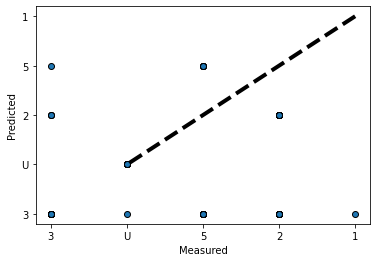

For testing data: [0.8, 0.74, 0.74, 0.7, 0.74]


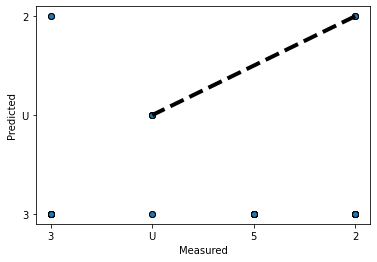

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rfc.fit(train_attributes, train_classes)
y_pred_rfc_val_bpca = rfc.predict(val_attributes)
print("For validation data:", cross_val_score(rfc, val_attributes, val_classes, 5))
plotting_cross_val_scores(y_pred_rfc_val_bpca, val_classes)

rfc.fit(train_attributes, train_classes)
y_pred_rfc_test_bpca = rfc.predict(test_attributes)
print("For testing data:", cross_val_score(rfc, test_attributes, test_classes, 5))
plotting_cross_val_scores(y_pred_rfc_test_bpca, test_classes)

For validation data: [0.8428571428571429, 0.7285714285714285, 0.7285714285714285, 0.8071428571428572, 0.8428571428571429]


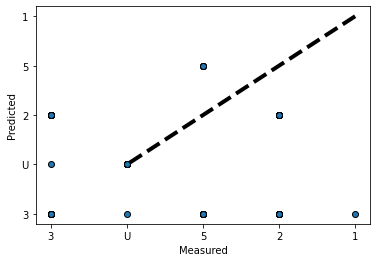

For testing data: [0.74, 0.76, 0.66, 0.74, 0.78]


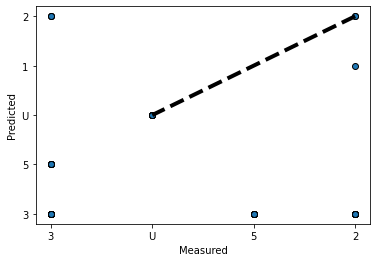

In [24]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=10, random_state=0)
dtc.fit(train_attributes, train_classes)
y_pred_dtc_val_bpca = dtc.predict(val_attributes)
print("For validation data:", cross_val_score(dtc, val_attributes, val_classes, 5))
plotting_cross_val_scores(y_pred_dtc_val_bpca , val_classes)

dtc.fit(train_attributes, train_classes)
y_pred_dtc_test_bpca  = dtc.predict(test_attributes)
print("For testing data:", cross_val_score(dtc, test_attributes, test_classes, 5))
plotting_cross_val_scores(y_pred_dtc_test_bpca , test_classes)

For validation data [0.75, 0.8285714285714286, 0.7928571428571428, 0.7857142857142857, 0.7714285714285715]


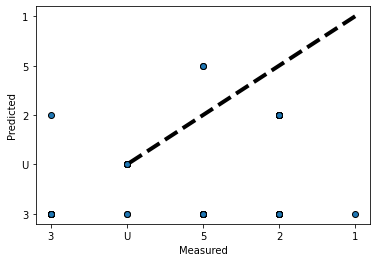

For testing data [0.7857142857142857, 0.8357142857142857, 0.7642857142857142, 0.7785714285714286, 0.7928571428571428]


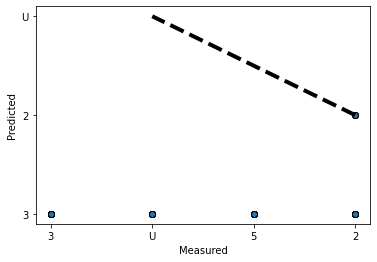

In [25]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier(n_estimators=100, max_samples=0.5, max_features=0.5, random_state=0)
bc.fit(train_attributes, train_classes)
y_pred_bc_val_bpca  = bc.predict(val_attributes)
print("For validation data", cross_val_score(bc, val_attributes, val_classes, 5))
plotting_cross_val_scores(y_pred_bc_val_bpca , val_classes)

bc.fit(train_attributes, train_classes)
y_pred_bc_test_bpca  = bc.predict(test_attributes)
print("For testing data", cross_val_score(bc, val_attributes, val_classes, 5))
plotting_cross_val_scores(y_pred_bc_test_bpca , test_classes)

In [26]:
train_attributes

,product-type,carbon,hardness,strength,shape,thick,width,len,bore
467,0,0.033302,-0.477458,-0.267167,0,-0.791863,-1.870959,-0.675142,0
319,0,-0.261159,-0.477458,-0.267167,1,-0.559593,1.330772,-0.271023,0
328,0,-0.261159,-0.477458,-0.267167,0,3.272859,-0.424617,-0.675142,2
443,0,-0.261159,-0.477458,-0.267167,1,-0.791863,-0.424617,-0.271023,0
493,0,-0.261159,-0.477458,2.417307,1,1.531997,1.219515,1.912914,0
...,...,...,...,...,...,...,...,...,...
71,0,-0.261159,-0.477458,-0.267167,0,2.692185,-0.424617,-0.675142,2
106,0,-0.261159,1.351396,-0.267167,0,0.485621,-0.424617,-0.675142,0
270,0,-0.261159,-0.477458,-0.267167,0,-0.999744,-0.424617,-0.675142,0
435,0,-0.261159,-0.477458,-0.267167,1,-0.560754,1.083534,1.912914,0


### Implement Principal Component Analysis from scratch, with sub-tasks as following:

### a. Centralize the Data via feature-wise means and standard deviations.  Write the code for deriving the covariance matrix from scratch.
### b. Make a function Singular_Value_Decomp from scratch in order to compute Eigenvectors, Eigenvalues and Principal Components.

In [27]:
X_covariance_mat = np.cov(train_attributes, rowvar=False)
X_covariance_mat

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.07495778e+00, -1.41664804e-01,
        -9.07497977e-02, -1.30286346e-01,  1.71622801e-01,
         6.02306332e-03, -1.67531342e-01,  9.13497034e-02],
       [ 0.00000000e+00, -1.41664804e-01,  1.03048639e+00,
        -1.52363084e-01, -4.20561795e-02,  1.18737417e-02,
         8.63234011e-04, -3.25728135e-02,  4.89352854e-02],
       [ 0.00000000e+00, -9.07497977e-02, -1.52363084e-01,
         1.16512047e+00, -4.14555061e-02,  8.12583524e-02,
         9.12309528e-02, -9.40250577e-02, -6.00790377e-04],
       [ 0.00000000e+00, -1.30286346e-01, -4.20561795e-02,
        -4.14555061e-02,  2.50483559e-01, -7.09366399e-02,
         9.18417183e-02,  3.05588746e-01, -4.25531915e-02],
       [ 0.00000000e+00,  1.71622801e-01,  1.18737417e-02,
         8.12583524e-02, -7.09366399e-02,  1.027404

In [28]:
eig_vals, eig_vecs = np.linalg.eig(X_covariance_mat)

print('Eigenvectors are\n%s' %eig_vecs)
print('\nEigenvalues corresponding to eigen vectors are\n%s' %eig_vals)

Eigenvectors are
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          1.        ]
 [ 0.01577562 -0.09794683 -0.59775258  0.52630785 -0.29092519  0.32374016
  -0.33971182  0.22583218  0.        ]
 [ 0.02397812 -0.07123335  0.23361937  0.41819029 -0.2086807   0.34359524
   0.77650808  0.01787752  0.        ]
 [-0.01517111 -0.01834845 -0.28088841  0.39899241 -0.05490739 -0.78735204
   0.20913594 -0.3076752   0.        ]
 [-0.52143549 -0.77982483  0.22160171  0.09311656  0.0888456  -0.10736808
  -0.10497232  0.17821228  0.        ]
 [ 0.11413677 -0.11571777 -0.48630648 -0.15902176  0.62332445 -0.01336458
   0.38153849  0.42132728  0.        ]
 [ 0.042329    0.04567639  0.00762744 -0.30083479 -0.59742575 -0.3328643
   0.13442162  0.64790187  0.        ]
 [ 0.15017693  0.29226621  0.45667723  0.51411617  0.33613785 -0.18041487
  -0.23271973  0.46846684  0.        ]
 [-0.83046914  0.52533069 -0.12248255  0.0120979   0.04966881  0.0464402
   0.09526167  

In [29]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i], i) for i in range(len(eig_vals))]

eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
1.4222395695598047
1.2817106086486416
1.1045146733689155
1.0788615034782338
0.8186302363351936
0.6536980892656796
0.1275329023775478
0.10744049566958076
0.0


In [30]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance captured by each component is \n",var_exp)
print(60 * '-')
print("Cumulative variance captured as we travel each component \n",cum_var_exp)

Variance captured by each component is 
 [21.566638066409276, 19.435676938139114, 16.748703038095307, 16.35970202720396, 12.413592192997847, 9.912584628945242, 1.93389074949347, 1.6292123587157918, 0.0]
------------------------------------------------------------
Cumulative variance captured as we travel each component 
 [ 21.56663807  41.002315    57.75101804  74.11072007  86.52431226
  96.43689689  98.37078764 100.         100.        ]


In [31]:
def plotting_scree_plot(eig_pairs):
    fig, ax = plt.subplots()
    ax.bar(range(1,len(eig_pairs)+1), var_exp, alpha=0.5, align='center',
           label='individual explained variance')
    ax.step(range(1,len(eig_pairs)+1), cum_var_exp, where='mid',
            label='cumulative explained variance')
    ax.set_ylabel('Explained variance ratio')
    ax.set_xlabel('Principal components')
    ax.set_xticks(range(1,len(eig_pairs)+1))
    ax.legend(loc='best')
    plt.show()

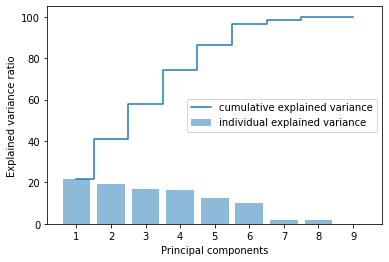

In [32]:
plotting_scree_plot(eig_pairs)

In [33]:
train_attributes

,product-type,carbon,hardness,strength,shape,thick,width,len,bore
467,0,0.033302,-0.477458,-0.267167,0,-0.791863,-1.870959,-0.675142,0
319,0,-0.261159,-0.477458,-0.267167,1,-0.559593,1.330772,-0.271023,0
328,0,-0.261159,-0.477458,-0.267167,0,3.272859,-0.424617,-0.675142,2
443,0,-0.261159,-0.477458,-0.267167,1,-0.791863,-0.424617,-0.271023,0
493,0,-0.261159,-0.477458,2.417307,1,1.531997,1.219515,1.912914,0
...,...,...,...,...,...,...,...,...,...
71,0,-0.261159,-0.477458,-0.267167,0,2.692185,-0.424617,-0.675142,2
106,0,-0.261159,1.351396,-0.267167,0,0.485621,-0.424617,-0.675142,0
270,0,-0.261159,-0.477458,-0.267167,0,-0.999744,-0.424617,-0.675142,0
435,0,-0.261159,-0.477458,-0.267167,1,-0.560754,1.083534,1.912914,0


In [34]:
print("All Eigen Values along with Eigen Vectors")
for i in range(len(eig_pairs)):
    print("Eigenvalue:", eig_pairs[i][0])
    print("Eigenvector:", list(eig_pairs[i][1]))
    print("Feature Number: ", eig_pairs[i][2])
    print(40 * '-')

All Eigen Values along with Eigen Vectors
Eigenvalue: 1.4222395695598047
Eigenvector: [0.0, -0.5977525770397965, 0.2336193673732633, -0.28088840688052474, 0.22160171468474224, -0.486306475276109, 0.0076274444774917195, 0.45667722634158614, -0.12248255343324303]
Feature Number:  2
----------------------------------------
Eigenvalue: 1.2817106086486416
Eigenvector: [0.0, 0.32374016093515257, 0.3435952443713865, -0.7873520417728167, -0.10736808311449876, -0.013364581180048967, -0.3328643033214966, -0.18041486862417924, 0.04644019822352236]
Feature Number:  5
----------------------------------------
Eigenvalue: 1.1045146733689155
Eigenvector: [0.0, 0.22583217704967617, 0.01787751694661513, -0.3076752046678915, 0.17821227561713135, 0.42132728056609575, 0.6479018700400704, 0.46846684427897833, 0.07417466352748425]
Feature Number:  7
----------------------------------------
Eigenvalue: 1.0788615034782338
Eigenvector: [0.0, -0.3397118228622531, 0.776508080022566, 0.2091359376753224, -0.1049723

In [35]:
matrix_final2 = np.hstack((eig_pairs[0][1].reshape(9,1), eig_pairs[1][1].reshape(9,1)))

matrix_final3 = np.hstack((matrix_final2, eig_pairs[2][1].reshape(9,1)))

matrix_final4 = np.hstack((matrix_final3, eig_pairs[3][1].reshape(9,1)))

matrix_final5 = np.hstack((matrix_final4, eig_pairs[4][1].reshape(9,1)))

matrix_final6 = np.hstack((matrix_final5, eig_pairs[5][1].reshape(9,1)))
matrix_final6


array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.59775258,  0.32374016,  0.22583218, -0.33971182, -0.29092519,
         0.52630785],
       [ 0.23361937,  0.34359524,  0.01787752,  0.77650808, -0.2086807 ,
         0.41819029],
       [-0.28088841, -0.78735204, -0.3076752 ,  0.20913594, -0.05490739,
         0.39899241],
       [ 0.22160171, -0.10736808,  0.17821228, -0.10497232,  0.0888456 ,
         0.09311656],
       [-0.48630648, -0.01336458,  0.42132728,  0.38153849,  0.62332445,
        -0.15902176],
       [ 0.00762744, -0.3328643 ,  0.64790187,  0.13442162, -0.59742575,
        -0.30083479],
       [ 0.45667723, -0.18041487,  0.46846684, -0.23271973,  0.33613785,
         0.51411617],
       [-0.12248255,  0.0464402 ,  0.07417466,  0.09526167,  0.04966881,
         0.0120979 ]])

In [36]:
train_attributes_a = train_attributes.dot(matrix_final6)
print("Training Set after PCA: ")
train_attributes_a

Training Set after PCA: 


,0,1,2,3,4,5
467,0.006090,0.812247,-1.780927,-0.834442,0.501848,0.052933
319,0.499725,-0.532205,0.692372,-0.414427,-0.955817,-0.801292
328,-2.028529,0.274040,0.950589,1.201381,2.356411,-1.159338
443,0.599290,0.055206,-0.542810,-0.739009,-0.051882,-0.236274
493,-0.274961,-3.030766,1.698688,0.421815,1.001096,1.093452
...,...,...,...,...,...,...
71,-1.746143,0.281800,0.705935,0.979831,1.994462,-1.066998
106,-0.000856,0.846796,-0.339404,1.367539,0.138073,0.024507
270,0.294231,0.238261,-0.997925,-0.619305,-0.406145,-0.504097
435,1.495758,-0.843907,1.554798,-0.956349,-0.074731,0.396068


In [37]:
val_attributes_a = val_attributes.dot(matrix_final6)
print("Validation Set after PCA: ")
val_attributes_a

Validation Set after PCA: 


,0,1,2,3,4,5
694,1.495758,-0.843907,1.554798,-0.956349,-0.074731,0.396068
665,1.289534,-0.781674,1.766291,-1.117030,-0.422603,0.572439
63,1.123943,1.234396,-0.236398,2.164990,-0.410821,1.116026
533,0.093571,-0.351928,0.324843,-0.215408,-1.180503,-1.102172
66,0.162193,0.285105,-0.678321,-0.501597,0.834120,-0.202182
...,...,...,...,...,...,...
182,1.484255,-0.341897,0.577664,-1.159077,0.826277,0.849772
549,-0.022524,0.038117,-0.004082,-0.251156,0.745129,-0.439606
500,2.026965,-0.168853,1.590741,0.587666,-0.614761,1.241826
223,1.482557,-0.267830,0.433497,-1.188988,0.959213,0.916712


In [38]:
test_attributes_a = test_attributes.dot(matrix_final6)
print("Test Set after PCA: ")
test_attributes_a

Test Set after PCA: 


,0,1,2,3,4,5
0,0.097446,0.803527,-0.415348,1.254398,0.019711,-0.001877
1,0.158638,0.216246,-0.853354,-0.470408,-0.217139,-0.578911
2,1.506664,1.167985,-0.546011,1.763048,-0.869658,1.169924
3,0.767868,0.887401,-0.953431,0.914716,-0.821986,0.283697
4,0.171843,-0.360011,0.268299,-0.237697,-1.251408,-1.099719
...,...,...,...,...,...,...
95,0.111195,0.016997,-0.063903,-0.309336,0.619486,-0.414283
96,0.145178,-0.173786,0.316237,-0.252184,0.323158,-0.541154
97,0.102641,0.390294,-0.790506,-0.460086,1.289481,-0.076906
98,1.074333,1.833064,-1.861086,1.776463,-0.246195,1.284647


<AxesSubplot:>

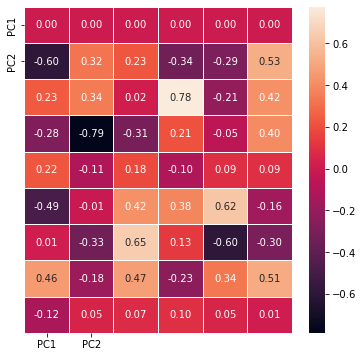

In [39]:
import seaborn as sb
import matplotlib.pyplot as plt
 
plt.figure(figsize = (6,6))
sb.heatmap(matrix_final6, xticklabels = ['PC1', 'PC2'], yticklabels = ['PC1', 'PC2'], annot = True, fmt = '.2f', linewidths = .5)

### Use the above-made PCA to reduce the data upto a chosen dimension/principal-components and train 2-3 chosen classification models alongside 5-Fold Cross-Validation Plots.

For validation data: [0.7928571428571428, 0.75, 0.8, 0.7928571428571428, 0.8]


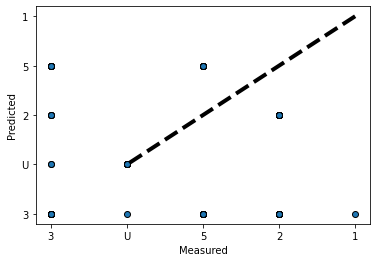

For testing data: [0.76, 0.8, 0.78, 0.8, 0.7]


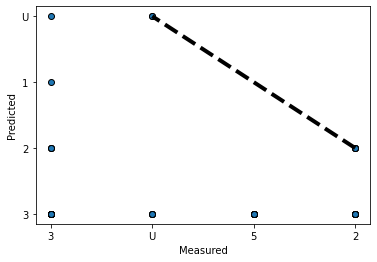

In [40]:
rfc2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rfc2.fit(train_attributes_a, train_classes)
y_pred_rfc_val_apca = rfc2.predict(val_attributes_a)
print("For validation data:", cross_val_score(rfc2, val_attributes_a, val_classes, 5))
plotting_cross_val_scores(y_pred_rfc_val_apca, val_classes)

rfc2.fit(train_attributes_a, train_classes)
y_pred_rfc_test_apca = rfc2.predict(test_attributes_a)
print("For testing data:", cross_val_score(rfc2, test_attributes_a, test_classes, 5))
plotting_cross_val_scores(y_pred_rfc_test_apca, test_classes)

For validation data: [0.7928571428571428, 0.7357142857142858, 0.8214285714285714, 0.8142857142857143, 0.7928571428571428]


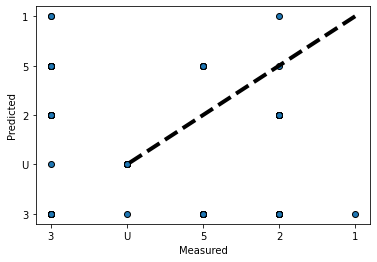

For testing data: [0.7, 0.62, 0.64, 0.7, 0.7]


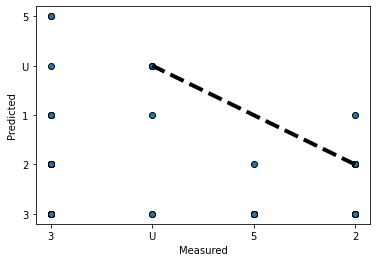

In [41]:
from sklearn.tree import DecisionTreeClassifier

dtc2 = DecisionTreeClassifier(max_depth=10, random_state=0)
dtc2.fit(train_attributes_a, train_classes)
y_pred_dtc_val_apca  = dtc2.predict(val_attributes_a)
print("For validation data:", cross_val_score(dtc2, val_attributes_a, val_classes, 5))
plotting_cross_val_scores(y_pred_dtc_val_apca, val_classes)

dtc2.fit(train_attributes_a, train_classes)
y_pred_dtc_test_apca = dtc2.predict(test_attributes_a)
print("For testing data:", cross_val_score(dtc2, test_attributes_a, test_classes, 5))
plotting_cross_val_scores(y_pred_dtc_test_apca, test_classes)

For validation data [0.8071428571428572, 0.8214285714285714, 0.7928571428571428, 0.7642857142857142, 0.8285714285714286]


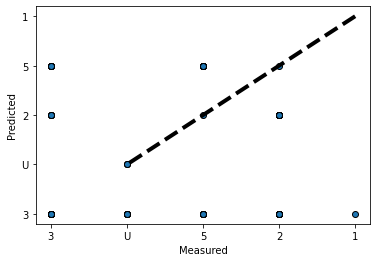

For testing data [0.74, 0.74, 0.68, 0.72, 0.78]


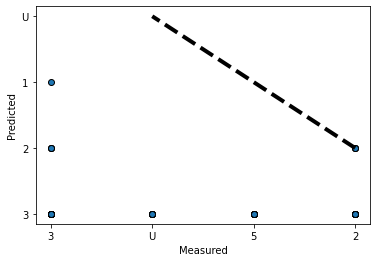

In [42]:
from sklearn.ensemble import BaggingClassifier

bc2 = BaggingClassifier(n_estimators=100, max_samples=0.5, max_features=0.5, random_state=0)
bc2.fit(train_attributes_a, train_classes)
y_pred_bc_val_apca = bc2.predict(val_attributes_a)
print("For validation data", cross_val_score(bc2, val_attributes_a, val_classes, 5))
plotting_cross_val_scores(y_pred_bc_val_apca, val_classes)

bc2.fit(train_attributes_a, train_classes)
y_pred_bc_test_apca = bc2.predict(test_attributes_a)
print("For testing data", cross_val_score(bc2, test_attributes_a, test_classes, 5))
plotting_cross_val_scores(y_pred_bc_test_apca, test_classes)

### Show the Test results of Classification Models on both types of datasets (Before and After PCA), via 2-3 Evaluation Metrics of choice (Ex:- Accuracy, Sensitivity, F1-Score, etc.) with the proper reasonings.

In [43]:
from sklearn.metrics import f1_score

print("Before PCA F1 Scores were: \n")
print("For Random Forest Classifier: ", f1_score(test_classes, y_pred_rfc_test_bpca, average='weighted'))
print("For Decision Tree Classifier: ", f1_score(test_classes, y_pred_dtc_test_bpca, average='weighted'))
print("For Bagging Classifier: ", f1_score(test_classes, y_pred_bc_test_bpca, average='weighted'))

print(40 * '-')
print("\n After PCA F1 Scores were: \n")
print("For Random Forest Classifier: ", f1_score(test_classes, y_pred_rfc_test_apca, average='weighted'))
print("For Decision Tree Classifier: ", f1_score(test_classes, y_pred_dtc_test_apca, average='weighted'))
print("For Bagging Classifier: ", f1_score(test_classes, y_pred_bc_test_apca, average='weighted'))


Before PCA F1 Scores were: 

For Random Forest Classifier:  0.7627829341317365
For Decision Tree Classifier:  0.7320569620253164
For Bagging Classifier:  0.7148885218827415
----------------------------------------

 After PCA F1 Scores were: 

For Random Forest Classifier:  0.7296161616161616
For Decision Tree Classifier:  0.6736589256392211
For Bagging Classifier:  0.686397493908806


### Were any changes observed before and after implementing PCA, with respect to the distribution of the dataset? 

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
print("Before PCA Accuracy was: \n")
print("For Random Forest Classifier: ", accuracy_score(test_classes, y_pred_rfc_test_bpca))
print("For Decision Tree Classifier: ", accuracy_score(test_classes, y_pred_dtc_test_bpca))
print("For Bagging Classifier: ", accuracy_score(test_classes, y_pred_bc_test_bpca))

print(40 * '-')
print("\n After PCA Accuracy was: \n")
print("For Random Forest Classifier: ", accuracy_score(test_classes, y_pred_rfc_test_apca))
print("For Decision Tree Classifier: ", accuracy_score(test_classes, y_pred_dtc_test_apca))
print("For Bagging Classifier: ", accuracy_score(test_classes, y_pred_bc_test_apca))

Before PCA Accuracy was: 

For Random Forest Classifier:  0.81
For Decision Tree Classifier:  0.75
For Bagging Classifier:  0.79
----------------------------------------

 After PCA Accuracy was: 

For Random Forest Classifier:  0.77
For Decision Tree Classifier:  0.66
For Bagging Classifier:  0.75


### Also, make any suitable graph through which the optimal number of principal components can be decided for optimal results.

In [46]:
def optimal_number_of_principal_components(train_attributes, train_classes, val_attributes, val_classes, test_attributes, test_classes):
    """
    This function calculates the optimal number of principal components
    for PCA. The function takes in the training, validation and testing
    data and class labels and returns the optimal number of principal
    components.
    """
    global matrix_final2
    global matrix_final3
    global matrix_final4
    global matrix_final5
    global matrix_final6
    global eig_pairs

    pred_val = []
    pred_test = []

    L = [matrix_final2, matrix_final3, matrix_final4, matrix_final5, matrix_final6]
    for i in range(0,len(L)):
        new_train = train_attributes.dot(L[i])
        new_val = val_attributes.dot(L[i])
        new_test = test_attributes.dot(L[i])
        model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
        model.fit(new_train, train_classes)
        y_pred_rfc_val = model.predict(new_val)
        y_pred_rfc_test = model.predict(new_test)
        y_pred_rfc_val_acc = accuracy_score(val_classes, y_pred_rfc_val)
        y_pred_rfc_test_acc = accuracy_score(test_classes, y_pred_rfc_test)
        pred_val.append(y_pred_rfc_val_acc)
        pred_test.append(y_pred_rfc_test_acc)
        
    #Plot between PCA Components and accuracies
    plt.plot(range(2,7), pred_val, 'bo-', label='Validation Accuracy')
    plt.plot(range(2,7), pred_test, 'ro-', label='Testing Accuracy')
    plt.xlabel('Number of Principal Components')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Principal Components')
    plt.legend()
    plt.show()


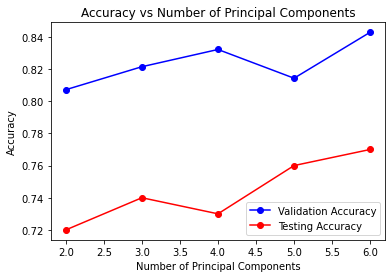

In [47]:
optimal_number_of_principal_components(train_attributes, train_classes, val_attributes, val_classes, test_attributes, test_classes)

# Question 2


### Implement Linear Discriminant Analysis from scratch with the following subtasks:-
### a. A function for computing within class and between class scatter matrices
### b. A function that will automatically select the number of linear discriminants based upon the percentage of variance that needs to be conserved.

In [48]:
class LDA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def select_LD(self,X,y):
        SW, SB=self.fit(X,y)
        A=np.linalg.inv(SW).dot(SB)
        eigenvalues,eigenvectors=np.linalg.eig(A)
        eigenvectors=eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.linear_discriminants = eigenvectors[0 : self.n_components] 

        eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i], i) for i in range(len(eigenvalues))]

        eig_pairs.sort(key=lambda x: x[0], reverse=True) 
        return eigenvalues, eig_pairs
        
    def select_n_components_based_on_variance(self, X, y, var):
        eig_vals, eig_p = self.select_LD(X,y)
        tot = sum(eig_vals)
        var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
        cum_var_exp = np.cumsum(var_exp)
        cum_var_exp = list(cum_var_exp)
        for i in cum_var_exp:
            if var > i:
                continue
            else:
                return cum_var_exp.index(i) + 1

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)
        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features)) # Within Class Scatter Matrix
        SB = np.zeros((n_features, n_features)) # Between Class Scater Matrix
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            SW += (X_c - mean_c).T.dot((X_c - mean_c))
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).to_numpy().reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)
        return SW, SB

    def transform(self, X):
        return np.dot(X, self.linear_discriminants.T)
    
    # ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']

In [49]:
tr_new = train_attributes.loc[:, ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']]
val_new = val_attributes.loc[:, ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']]
test_new = test_attributes.loc[:, ['carbon', 'hardness', 'strength', 'thick', 'width', 'len']]

lda = LDA(2)
lda.select_LD(tr_new, train_classes)
lda.select_LD(val_new, val_classes)
lda.select_LD(test_new, test_classes)

(array([ 1.24659398e+00,  9.50295754e-02,  5.14391094e-02, -2.08214379e-17,
         1.07421753e-17, -1.98863115e-18]),
 [(1.246593980891346,
   array([-0.046071  , -0.56414706,  0.09624902, -0.09585725, -0.80864697,
          -0.47889058]),
   0),
  (0.09502957542495886,
   array([-0.96410864, -0.12712881,  0.13731092,  0.1553043 ,  0.0134142 ,
          -0.01911432]),
   1),
  (0.05143910940985918,
   array([-0.03192417,  0.29133158,  0.84269736,  0.17686931, -0.17078584,
          -0.17800553]),
   2),
  (2.0821437881523436e-17,
   array([-0.16646679,  0.32602845,  0.08350777, -0.89875451, -0.2384238 ,
          -0.23369163]),
   3),
  (1.074217534628258e-17,
   array([ 0.01092929, -0.59245987,  0.50384596, -0.15457018,  0.4363616 ,
           0.5577189 ]),
   4),
  (1.9886311482492716e-18,
   array([-0.19880191,  0.35128197, -0.03014445, -0.32211426, -0.26360003,
           0.6106966 ]),
   5)])

In [50]:
new_tr = lda.transform(tr_new)
new_val = lda.transform(val_new)
new_test = lda.transform(test_new)

In [51]:
new_tr

array([[ 0.71290601,  0.57721049],
       [ 0.64246004, -0.93588115],
       [ 0.06563845,  1.21164541],
       ...,
       [ 0.77688499, -0.18134481],
       [ 0.2057804 , -0.02260355],
       [ 0.5654704 ,  0.2173278 ]])

In [52]:
new_val

array([[ 2.05780404e-01, -2.26035455e-02],
       [ 2.07272623e-01, -4.55746031e-01],
       [-2.76523858e+00, -2.21460350e-01],
       [ 7.22799571e-01, -1.07784069e+00],
       [ 5.35101297e-01,  6.68117932e-01],
       [-1.06535301e+00, -1.13567880e+00],
       [ 6.42462746e-01, -9.36027624e-01],
       [ 7.03805042e-01, -3.80751141e-02],
       [ 7.19790464e-01, -1.08733428e+00],
       [ 6.68532547e-01,  8.63865154e-01],
       [ 7.13870690e-01,  6.38793150e-02],
       [ 6.23274891e-01,  1.04116582e-01],
       [ 2.08433962e-01,  8.33577456e-01],
       [ 6.23127439e-01, -8.98017861e-01],
       [ 1.80923471e-01,  1.32485266e+00],
       [ 6.68339221e-01,  8.64243787e-01],
       [ 7.03805042e-01, -3.80751141e-02],
       [ 6.92120705e-01, -4.24913958e-01],
       [ 5.65277076e-01,  2.17706434e-01],
       [ 1.88416180e-01, -1.01544471e-01],
       [ 6.84176381e-01,  2.06622767e-04],
       [ 5.65470402e-01,  2.17327801e-01],
       [ 7.45797366e-01, -1.23488020e-01],
       [-1.

In [53]:
new_test

array([[-1.13010733e+00,  1.54554932e-02],
       [ 7.14838834e-01, -7.69511548e-02],
       [-2.50024943e+00, -4.47364636e-01],
       [-1.10328310e+00, -4.28282192e-01],
       [ 7.33759708e-01, -1.10262269e+00],
       [ 6.81911117e-01,  7.67041780e-01],
       [ 3.66585677e-01,  2.06904289e+00],
       [ 6.09873011e-01,  1.11832357e-01],
       [ 7.83063666e-02,  1.07842804e+00],
       [ 5.55603358e-01, -6.72899558e-01],
       [ 6.27703683e-01,  7.69106387e-02],
       [-1.56381486e+00,  4.70916989e-01],
       [ 6.96829856e-01, -4.16802193e-02],
       [ 4.59381647e-01,  9.50382991e-02],
       [ 2.38779747e-01,  7.64277012e-01],
       [ 1.20258486e-01,  1.40051686e+00],
       [-1.12020455e+00, -1.38361663e+00],
       [ 7.17766271e-01, -1.08795411e+00],
       [-1.41340179e+00,  1.14514351e+00],
       [ 1.61993106e-02,  1.96072179e-01],
       [-1.88752244e+00, -4.57002578e-01],
       [ 2.04499398e-01,  1.23970917e+00],
       [ 4.00636786e-01,  8.55570268e-01],
       [ 1.

### A function that will automatically select the number of linear discriminants based upon the percentage of variance that needs to be conserved

In [54]:
print(lda.select_n_components_based_on_variance(tr_new, train_classes, 96))

3


### Perform PCA and compare the results with LDA

In [55]:
rfc_lda = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
rfc_lda.fit(new_tr, train_classes)
y_pred_rfc_val_alda = rfc_lda.predict(new_val)
y_pred_rfc_test_alda = rfc_lda.predict(new_test)

print("CASE of LDA for Random Forest Classifier: \n")
print("For Validation data: ", cross_val_score(rfc_lda, new_val, val_classes, 5))
print("For Test data: ", cross_val_score(rfc_lda, new_test, test_classes, 5))

CASE of LDA for Random Forest Classifier: 

For Validation data:  [0.7928571428571428, 0.8357142857142857, 0.8142857142857143, 0.8142857142857143, 0.8357142857142857]
For Test data:  [0.74, 0.78, 0.64, 0.76, 0.8]


In [56]:
dtc_lda = DecisionTreeClassifier(max_depth=10, random_state=0)
dtc_lda.fit(new_tr, train_classes)
y_pred_dtc_val_alda = dtc_lda.predict(new_val)
y_pred_dtc_test_alda = dtc_lda.predict(new_test)

print("CASE of LDA for Decision Tree Classifier: \n")
print("For Validation data: ", cross_val_score(dtc_lda, new_val, val_classes, 5))
print("For Test data: ", cross_val_score(dtc_lda, new_test, test_classes, 5))

CASE of LDA for Decision Tree Classifier: 

For Validation data:  [0.7785714285714286, 0.7785714285714286, 0.7714285714285715, 0.7571428571428571, 0.8]
For Test data:  [0.74, 0.62, 0.72, 0.76, 0.7]


In [57]:
bc_lda = BaggingClassifier(n_estimators=100, max_samples=0.5, max_features=0.5, random_state=0)
bc_lda.fit(new_tr, train_classes)
y_pred_bc_val_alda = bc_lda.predict(new_val)
y_pred_bc_test_alda = bc_lda.predict(new_test)

print("CASE of LDA for Bagging Classifier: \n")
print("For Validation data: ", cross_val_score(bc_lda, new_val, val_classes, 5))
print("For Test data: ", cross_val_score(bc_lda, new_test, test_classes, 5))

CASE of LDA for Bagging Classifier: 

For Validation data:  [0.7857142857142857, 0.7714285714285715, 0.7571428571428571, 0.7928571428571428, 0.8142857142857143]
For Test data:  [0.8, 0.78, 0.7, 0.72, 0.82]


### Identify features having a high impact on classification tasks using both PCA and LDA and visualize the sample space using the first two principal components and first two linear discriminants and comment your observations

In [58]:
print("For PCA, earlier we found out that the feature values for which the eigen value had the maximum value of variance were the features :\n")
print("carbon", "with Eigen value = ", eig_pairs[0][0])
print("thick", "with Eigen value = ", eig_pairs[1][0])
print("width", "with Eigen value = ", eig_pairs[2][0])
print("len", "with Eigen value = ", eig_pairs[3][0])

For PCA, earlier we found out that the feature values for which the eigen value had the maximum value of variance were the features :

carbon with Eigen value =  1.4222395695598047
thick with Eigen value =  1.2817106086486416
width with Eigen value =  1.1045146733689155
len with Eigen value =  1.0788615034782338


In [59]:
print("For LDA, earlier we found out that the feature values for which the eigen value had the maximum value of variance were the features :\n")

a, b = lda.select_LD(tr_new, train_classes)

print("Feature Number",b[0][2], "with Eigen value = ", b[0][0])
print("Feature Number",b[1][2], "with Eigen value = ", b[1][0])

For LDA, earlier we found out that the feature values for which the eigen value had the maximum value of variance were the features :

Feature Number 0 with Eigen value =  0.7702713797952562
Feature Number 1 with Eigen value =  0.22193354964045184


### Using any 2 classification techniques make a 2 * 2 table with column headers as classification techniques used and row headers as feature extraction methods used.The values inside the table should be the accuracy achieved in each case. Compare the results of the table.

In [60]:
print("For the Validation Data: \n")
new_df_val = pd.DataFrame(columns = ['Decision Tree', 'Bagging Classifier'])
new_df_val.loc[len(new_df_val)] = [accuracy_score(y_pred_dtc_val_apca, val_classes), accuracy_score(y_pred_bc_val_apca, val_classes)]
new_df_val.loc[len(new_df_val)] = [accuracy_score(y_pred_dtc_val_alda, val_classes), accuracy_score(y_pred_bc_val_alda, val_classes)]
new_df_val.index = ['PCA', 'LDA']
new_df_val

For the Validation Data: 



,Decision Tree,Bagging Classifier
PCA,0.785714,0.821429
LDA,0.814286,0.814286


In [61]:
print("For the Testing Data: \n")
new_df_test = pd.DataFrame(columns = ['Decision Tree', 'Bagging Classifier'])
new_df_test.loc[len(new_df_test)] = [accuracy_score(y_pred_dtc_test_apca, test_classes), accuracy_score(y_pred_bc_test_apca, test_classes)]
new_df_test.loc[len(new_df_test)] = [accuracy_score(y_pred_dtc_test_alda, test_classes), accuracy_score(y_pred_bc_test_alda, test_classes)]
new_df_test.index = ['PCA', 'LDA']
new_df_test

For the Testing Data: 



,Decision Tree,Bagging Classifier
PCA,0.66,0.75
LDA,0.75,0.74


In [62]:
print("For the Validation Data Cross Val Scores are: ", cross_val_score(dtc_lda, new_val, val_classes, 5))
print("For the Testing Data Cross Val Scores are: ", cross_val_score(dtc_lda, new_test, test_classes, 5))

For the Validation Data Cross Val Scores are:  [0.7214285714285714, 0.7428571428571429, 0.8, 0.7642857142857142, 0.7214285714285714]
For the Testing Data Cross Val Scores are:  [0.72, 0.66, 0.7, 0.72, 0.8]


### Using LDA as a classifier, perform 5-fold cross-validation and plot ROC and compute AUC for each fold from scratch

In [63]:
from sklearn.metrics import roc_curve, auc
def plotting_ROC_computing_AUC(y_test, y_pred):
    n_classes = len(np.unique(y_test))
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_pred[:,i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot of a ROC curve for a specific class
    for i in range(n_classes):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

# plotting_ROC_computing_AUC(test_classes, y_pred_dtc_test_alda)

                                THANK YOU